In [1]:
import warnings
warnings.filterwarnings("ignore")

def set_seed(seed=123):
    import random
    import numpy as np
    import tensorflow as tf
    import warnings
    warnings.filterwarnings("ignore")
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)

SEED = 123
set_seed(SEED)

# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from subprocess import check_output

# Reading the dataset
data = pd.read_csv("cleaned_dataset.csv")

# Checking the dataset
data.head()
data.tail()
data.describe()



,Net_Profit_to_Total_Assets,Total_Liabilities_to_Total_Assets,Working_Capital_to_Total_Assets,Current_Assets_to_Short_term_Liabilities,Retained_Earnings_to_Total_Assets,Sales_to_Total_Assets,Equity_to_Total_Assets,Current_Liabilities_to_Total_Assets,Book_Value_of_Equity_to_Total_Liabilities,Gross_Profit_to_Sales,Sales_to_Inventory,target
count,49433.000000,49433.000000,49433.000000,4.943300e+04,49433.000000,49433.000000,49433.000000,49433.000000,49433.000000,49433.000000,4.943300e+04,49433.000000
mean,0.139540,0.536767,0.208886,5.577848e+04,0.068221,2.234839,0.628422,0.430858,11.019965,0.227738,3.097848e+08,0.045860
std,2.790334,5.111106,5.102068,1.236870e+07,6.298595,56.511493,12.642557,5.096996,473.521628,45.517774,1.414327e+09,0.209184
min,-463.890000,0.000000,-479.960000,0.000000e+00,-508.410000,0.000000,-479.910000,0.000000,-3.735100,-1578.700000,0.000000e+00,0.000000
25%,0.008818,0.178825,0.050185,7.990200e-01,0.000000,0.912060,0.330910,0.136051,0.197990,0.008002,4.990300e+00,0.000000
50%,0.070668,0.408540,0.254380,1.373600e+00,0.000000,1.107300,0.568390,0.291950,0.816110,0.050098,1.018000e+01,0.000000
75%,0.206320,0.651840,0.550610,2.493300e+00,0.251300,1.888000,0.809233,0.495750,2.217100,0.145260,2.801700e+01,0.000000
max,94.280000,480.960000,28.336000,2.750000e+09,322.200000,9742.300000,1084.700000,480.960000,53432.000000,9230.500000,9.990000e+09,1.000000


In [2]:
# apply first randomundersampling to the dataset then Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

#drop the target column
X = data.drop('target', axis=1)
y = data['target']

#apply undersampling to the dataset before splitting it into the features and the target
rus = RandomUnderSampler(random_state=SEED)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = SEED)


In [3]:
#print number of features in X_train and their names
print("Number of features in X_train: ", len(X_train.columns))
print("Features in X_train: ", X_train.columns)


Number of features in X_train:  11
Features in X_train:  Index(['Net_Profit_to_Total_Assets', 'Total_Liabilities_to_Total_Assets',
       'Working_Capital_to_Total_Assets',
       'Current_Assets_to_Short_term_Liabilities',
       'Retained_Earnings_to_Total_Assets', 'Sales_to_Total_Assets',
       'Equity_to_Total_Assets', 'Current_Liabilities_to_Total_Assets',
       'Book_Value_of_Equity_to_Total_Liabilities', 'Gross_Profit_to_Sales',
       'Sales_to_Inventory'],
      dtype='object')


In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

# Define cross-validation with stratified k-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

In [5]:
#print number of features in X_train and their names in X_train
print("Number of features in X_train: ", len(X_train.columns))
print("Features in X_train: ", X_train.columns)

Number of features in X_train:  11
Features in X_train:  Index(['Net_Profit_to_Total_Assets', 'Total_Liabilities_to_Total_Assets',
       'Working_Capital_to_Total_Assets',
       'Current_Assets_to_Short_term_Liabilities',
       'Retained_Earnings_to_Total_Assets', 'Sales_to_Total_Assets',
       'Equity_to_Total_Assets', 'Current_Liabilities_to_Total_Assets',
       'Book_Value_of_Equity_to_Total_Liabilities', 'Gross_Profit_to_Sales',
       'Sales_to_Inventory'],
      dtype='object')


In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

In [7]:
#evaluate the performance of the models
def evaluate_model(model, X_test, y_test, y_pred, y_pred_prob):
    accuracy = accuracy_score(y_test, y_pred) *100
    print(f"Accuracy: {accuracy:.2f}")

    precision = precision_score(y_test, y_pred) *100
    print(f"Precision: {precision:.2f}")

    recall = recall_score(y_test, y_pred) *100
    print(f"Recall: {recall:.2f}")

    f1 = f1_score(y_test, y_pred) *100
    print(f"F1 Score: {f1:.2f}")

    roc_auc = roc_auc_score(y_test, y_pred_prob) *100
    print(f"ROC-AUC: {roc_auc:.2f}")

    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    class_report = classification_report(y_test, y_pred)
    print("Classification Report:\n", class_report)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
    cv_scores = cross_val_score(model, X_test, y_test, cv=cv, scoring='accuracy')
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Cross-Validation Score:", cv_scores.mean())

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, label='Model (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    import seaborn as sns
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

Logistic Regression
Best Accuracy: 49.66 %
Best Parameters: {'C': 0.001, 'penalty': 'l2'}
Accuracy: 51.49
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
ROC-AUC: 50.63
Confusion Matrix:
 [[467   0]
 [440   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      1.00      0.68       467
           1       0.00      0.00      0.00       440

    accuracy                           0.51       907
   macro avg       0.26      0.50      0.34       907
weighted avg       0.27      0.51      0.35       907

Cross-Validation Scores: [0.51648352 0.54945055 0.50828729 0.45856354 0.52486188]
Mean Cross-Validation Score: 0.5115293546232773


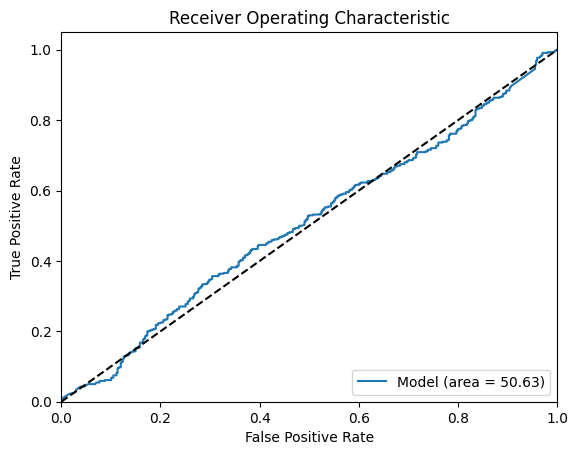

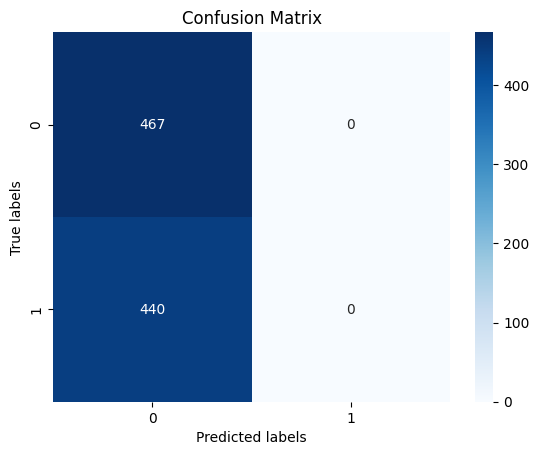

Decision Tree
Best Accuracy: 69.40 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 7}
Accuracy: 68.80
Precision: 64.90
Recall: 77.73
F1 Score: 70.73
ROC-AUC: 73.96
Confusion Matrix:
 [[282 185]
 [ 98 342]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.60      0.67       467
           1       0.65      0.78      0.71       440

    accuracy                           0.69       907
   macro avg       0.70      0.69      0.69       907
weighted avg       0.70      0.69      0.69       907

Cross-Validation Scores: [0.70879121 0.59340659 0.64088398 0.65745856 0.61878453]
Mean Cross-Validation Score: 0.6438649748042014


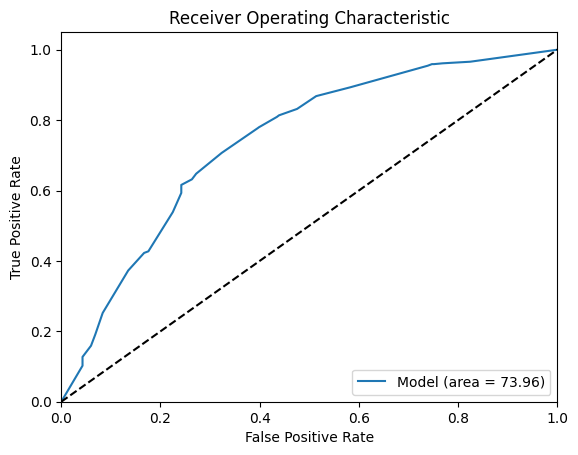

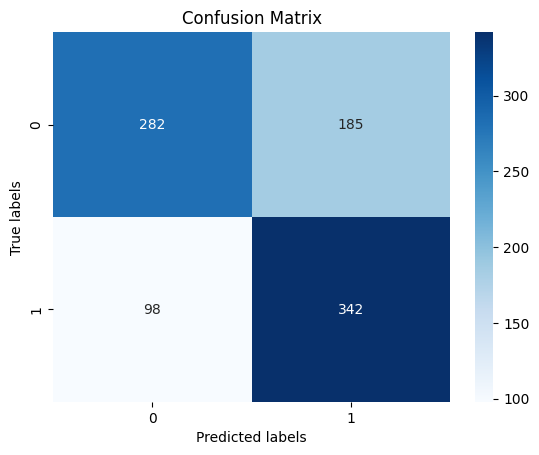

Random Forest
Best Accuracy: 71.96 %
Best Parameters: {'max_depth': 9, 'n_estimators': 100}
Accuracy: 72.33
Precision: 69.73
Recall: 75.91
F1 Score: 72.69
ROC-AUC: 79.36
Confusion Matrix:
 [[322 145]
 [106 334]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.69      0.72       467
           1       0.70      0.76      0.73       440

    accuracy                           0.72       907
   macro avg       0.72      0.72      0.72       907
weighted avg       0.73      0.72      0.72       907

Cross-Validation Scores: [0.72527473 0.68681319 0.65745856 0.71823204 0.69060773]
Mean Cross-Validation Score: 0.6956772509258697


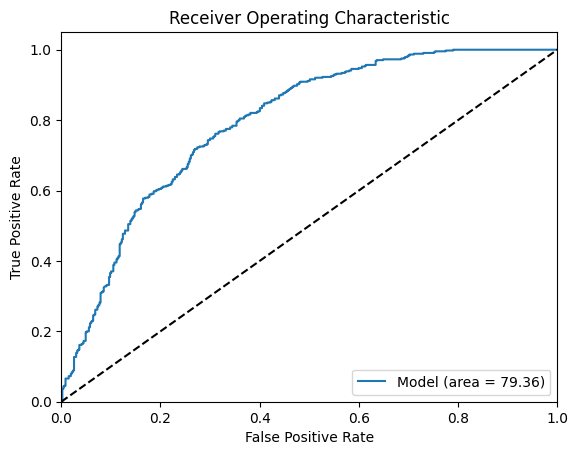

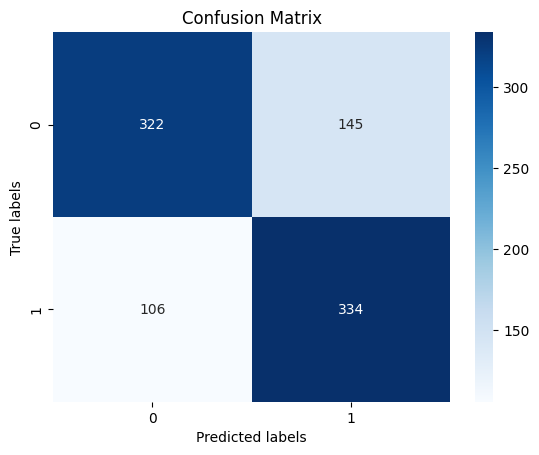

XGBoost
Best Accuracy: 71.60 %
Best Parameters: {'max_depth': 6, 'n_estimators': 10}
Accuracy: 73.54
Precision: 71.46
Recall: 75.68
F1 Score: 73.51
ROC-AUC: 80.41
Confusion Matrix:
 [[334 133]
 [107 333]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74       467
           1       0.71      0.76      0.74       440

    accuracy                           0.74       907
   macro avg       0.74      0.74      0.74       907
weighted avg       0.74      0.74      0.74       907

Cross-Validation Scores: [0.71428571 0.68681319 0.65745856 0.70165746 0.64088398]
Mean Cross-Validation Score: 0.6802197802197802


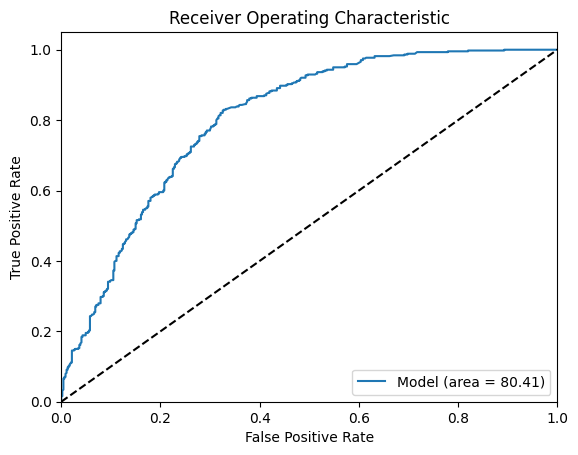

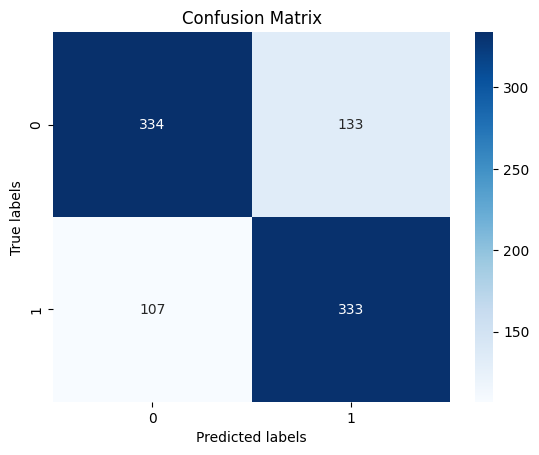

KNN
Best Accuracy: 63.30 %
Best Parameters: {'n_neighbors': 10, 'weights': 'distance'}
Accuracy: 62.18
Precision: 60.25
Recall: 64.77
F1 Score: 62.43
ROC-AUC: 67.34
Confusion Matrix:
 [[279 188]
 [155 285]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.60      0.62       467
           1       0.60      0.65      0.62       440

    accuracy                           0.62       907
   macro avg       0.62      0.62      0.62       907
weighted avg       0.62      0.62      0.62       907

Cross-Validation Scores: [0.63736264 0.57692308 0.52486188 0.66298343 0.55248619]
Mean Cross-Validation Score: 0.5909234411996842


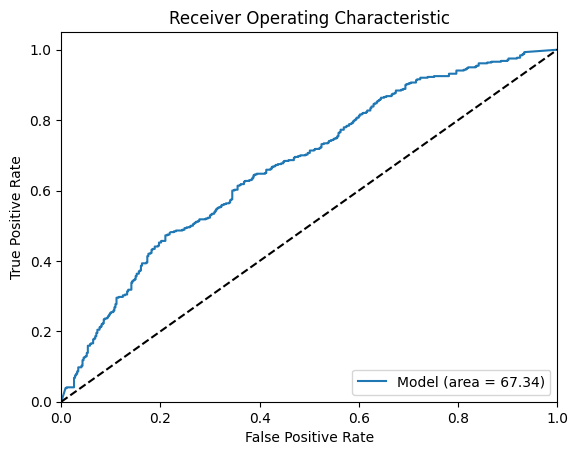

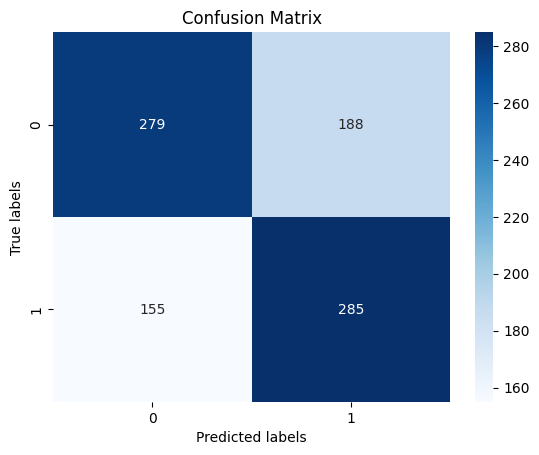

CatBoost
Best Accuracy: 72.87 %
Best Parameters: {'depth': 10, 'iterations': 1000}
Accuracy: 73.98
Precision: 70.99
Recall: 78.41
F1 Score: 74.51
ROC-AUC: 81.74
Confusion Matrix:
 [[326 141]
 [ 95 345]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.70      0.73       467
           1       0.71      0.78      0.75       440

    accuracy                           0.74       907
   macro avg       0.74      0.74      0.74       907
weighted avg       0.74      0.74      0.74       907

Cross-Validation Scores: [0.73076923 0.66483516 0.66298343 0.70165746 0.71823204]
Mean Cross-Validation Score: 0.6956954647562383


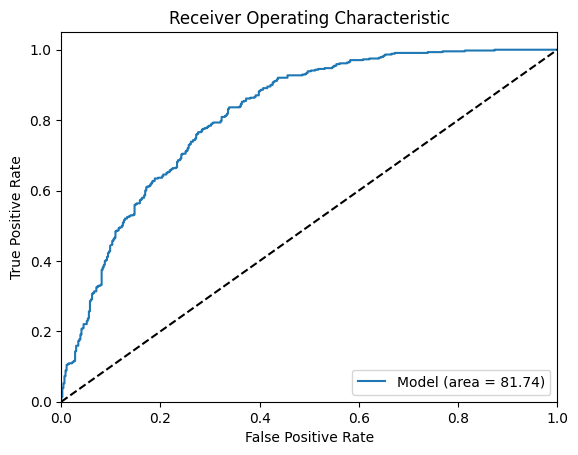

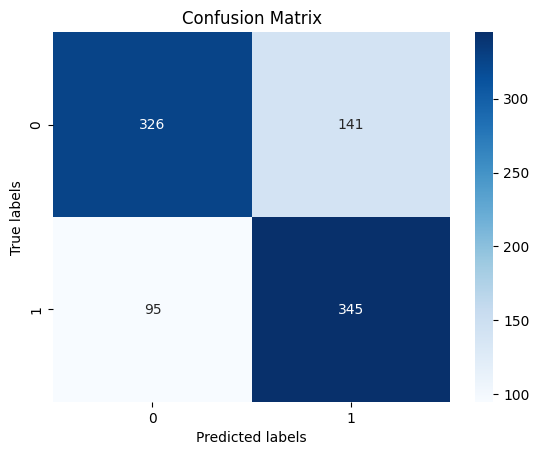

In [8]:
#hyperparameters for the models
params = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
    'Decision Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'Random Forest': {'n_estimators': [10, 100, 1000], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'XGBoost': {'n_estimators': [10, 100, 1000], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'KNN': {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance']},
    'CatBoost': {'iterations': [10, 100, 1000], 'depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
}

#applying the models
models = {
    'Logistic Regression': LogisticRegression,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'XGBoost': XGBClassifier,
    'KNN': KNeighborsClassifier,
    'CatBoost': lambda: CatBoostClassifier(verbose=False)
}

for model_name, model in models.items():
    print(model_name)
    model = model()
    grid_search = GridSearchCV(estimator = model, param_grid = params[model_name], scoring = 'accuracy', cv = 5, n_jobs = -1)
    grid_search = grid_search.fit(X_train, y_train)
    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_
    print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
    print("Best Parameters:", best_parameters)

    model = model.set_params(**best_parameters)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    evaluate_model(model, X_test, y_test, y_pred, y_pred_prob)


In [13]:
import joblib

# Best parameters from GridSearchCV
best_params = {
    'Logistic Regression': {'C': 0.001, 'penalty': 'l2'},
    'Decision Tree': {'criterion': 'entropy', 'max_depth': 7},
    'Random Forest': {'max_depth': 9, 'n_estimators': 100},
    'XGBoost': {'max_depth': 6, 'n_estimators': 10},
    'KNN': {'n_neighbors': 10, 'weights': 'distance'},
    'CatBoost': {'depth': 10, 'iterations': 1000, 'verbose': False}
}

# Initializing and saving models
models = {
    'Logistic Regression': LogisticRegression(**best_params['Logistic Regression']),
    'Decision Tree': DecisionTreeClassifier(**best_params['Decision Tree']),
    'Random Forest': RandomForestClassifier(**best_params['Random Forest']),
    'XGBoost': XGBClassifier(**best_params['XGBoost']),
    'KNN': KNeighborsClassifier(**best_params['KNN']),
    'CatBoost': CatBoostClassifier(**best_params['CatBoost'])
}

for name, model in models.items():
    model.fit(X_train, y_train)  # Fit the model with training data
    joblib.dump(model, f'Saved models/{name.replace(" ", "")}.pkl')

print("Models saved successfully!")



Models saved successfully!


Logistic Regression
Accuracy: 51.49
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
ROC-AUC: 50.63
Confusion Matrix:
 [[467   0]
 [440   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      1.00      0.68       467
           1       0.00      0.00      0.00       440

    accuracy                           0.51       907
   macro avg       0.26      0.50      0.34       907
weighted avg       0.27      0.51      0.35       907

Cross-Validation Scores: [0.51648352 0.54945055 0.50828729 0.45856354 0.52486188]
Mean Cross-Validation Score: 0.5115293546232773


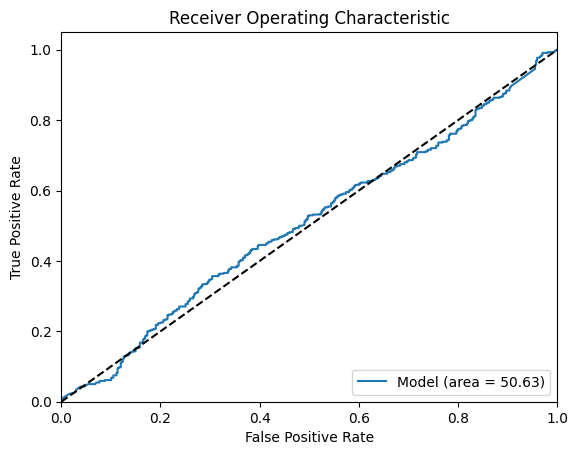

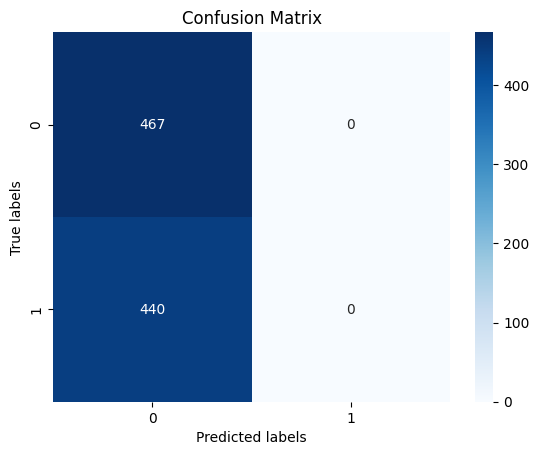

Decision Tree
Accuracy: 68.69
Precision: 64.77
Recall: 77.73
F1 Score: 70.66
ROC-AUC: 73.77
Confusion Matrix:
 [[281 186]
 [ 98 342]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.60      0.66       467
           1       0.65      0.78      0.71       440

    accuracy                           0.69       907
   macro avg       0.69      0.69      0.69       907
weighted avg       0.70      0.69      0.68       907

Cross-Validation Scores: [0.71428571 0.59340659 0.64088398 0.65745856 0.62430939]
Mean Cross-Validation Score: 0.6460688482787931


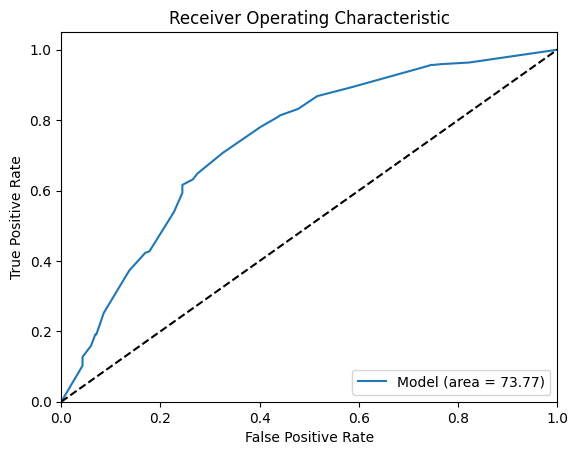

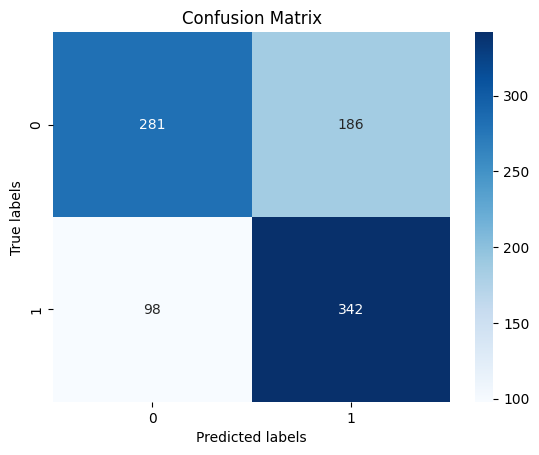

Random Forest
Accuracy: 72.00
Precision: 69.62
Recall: 75.00
F1 Score: 72.21
ROC-AUC: 79.65
Confusion Matrix:
 [[323 144]
 [110 330]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.69      0.72       467
           1       0.70      0.75      0.72       440

    accuracy                           0.72       907
   macro avg       0.72      0.72      0.72       907
weighted avg       0.72      0.72      0.72       907

Cross-Validation Scores: [0.71978022 0.65934066 0.67403315 0.6961326  0.69060773]
Mean Cross-Validation Score: 0.6879788719567725


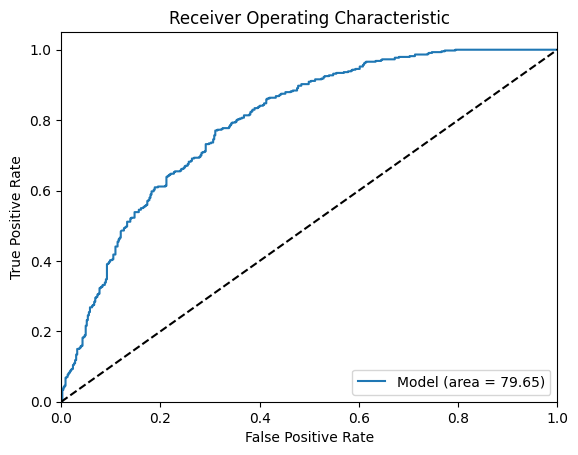

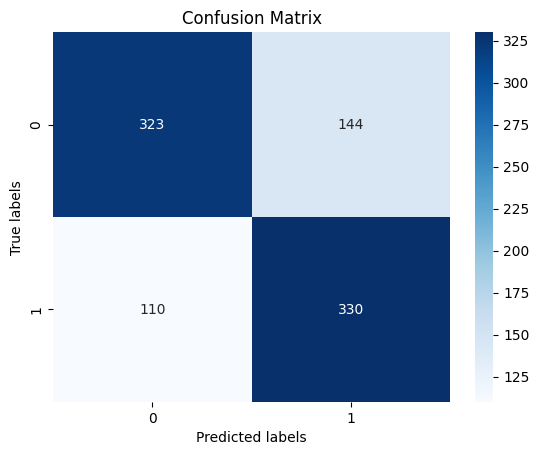

XGBoost
Accuracy: 73.54
Precision: 71.46
Recall: 75.68
F1 Score: 73.51
ROC-AUC: 80.41
Confusion Matrix:
 [[334 133]
 [107 333]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74       467
           1       0.71      0.76      0.74       440

    accuracy                           0.74       907
   macro avg       0.74      0.74      0.74       907
weighted avg       0.74      0.74      0.74       907

Cross-Validation Scores: [0.71428571 0.68681319 0.65745856 0.70165746 0.64088398]
Mean Cross-Validation Score: 0.6802197802197802


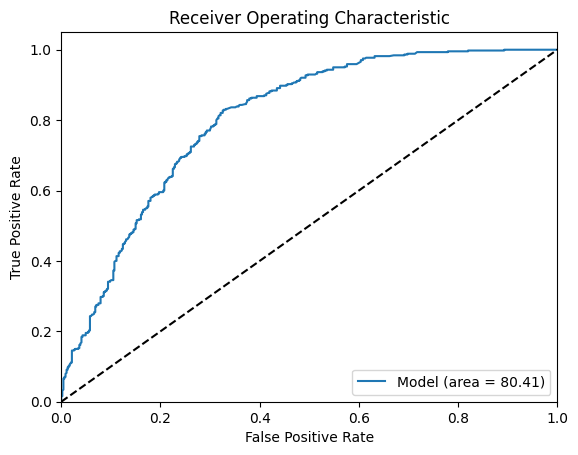

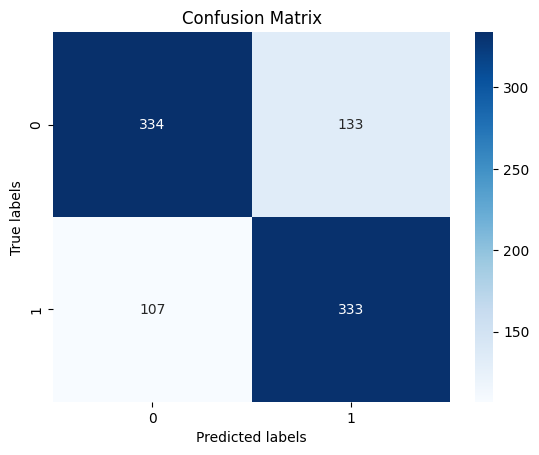

KNN
Accuracy: 62.18
Precision: 60.25
Recall: 64.77
F1 Score: 62.43
ROC-AUC: 67.34
Confusion Matrix:
 [[279 188]
 [155 285]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.60      0.62       467
           1       0.60      0.65      0.62       440

    accuracy                           0.62       907
   macro avg       0.62      0.62      0.62       907
weighted avg       0.62      0.62      0.62       907

Cross-Validation Scores: [0.63736264 0.57692308 0.52486188 0.66298343 0.55248619]
Mean Cross-Validation Score: 0.5909234411996842


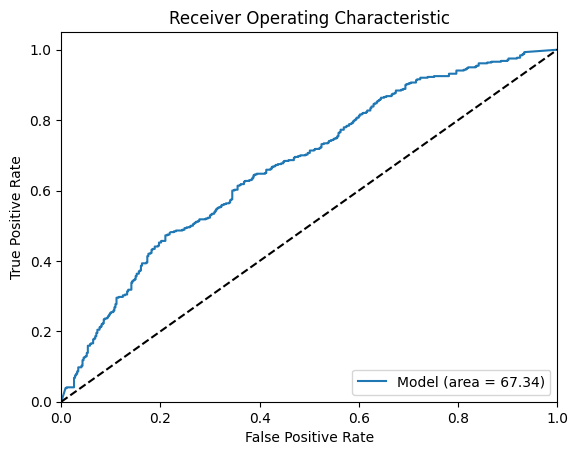

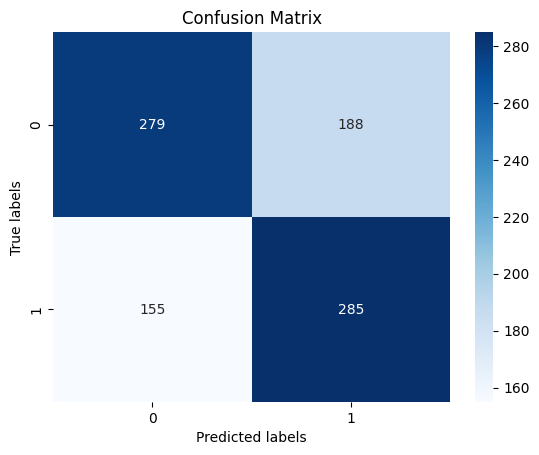

CatBoost
Accuracy: 73.98
Precision: 70.99
Recall: 78.41
F1 Score: 74.51
ROC-AUC: 81.74
Confusion Matrix:
 [[326 141]
 [ 95 345]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.70      0.73       467
           1       0.71      0.78      0.75       440

    accuracy                           0.74       907
   macro avg       0.74      0.74      0.74       907
weighted avg       0.74      0.74      0.74       907

Cross-Validation Scores: [0.73076923 0.66483516 0.66298343 0.70165746 0.71823204]
Mean Cross-Validation Score: 0.6956954647562383


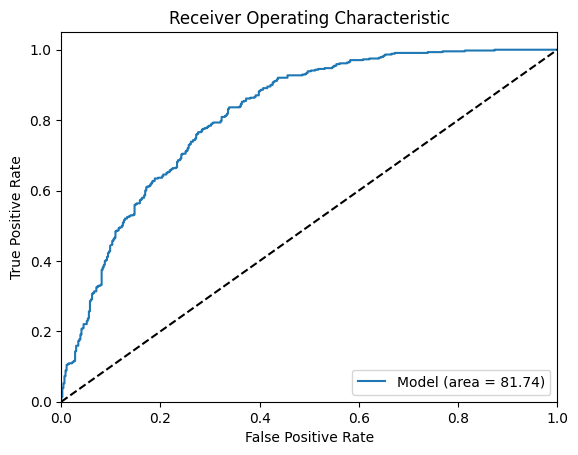

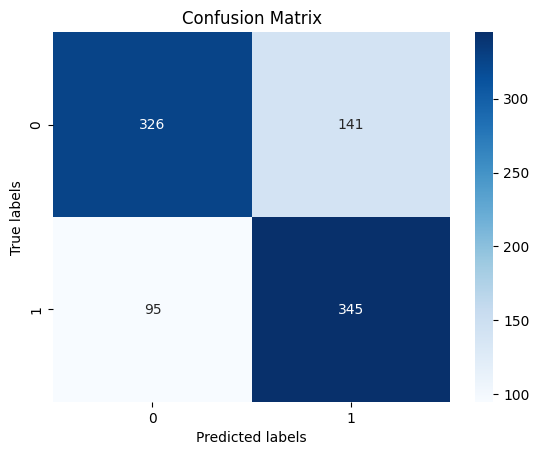

In [14]:
#load the models and check their performance
models = {}
for model_name in best_params.keys():
    model = joblib.load(f'Saved models/{model_name.replace(" ", "")}.pkl')
    models[model_name] = model

for model_name, model in models.items():
    print(model_name)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    evaluate_model(model, X_test, y_test, y_pred, y_pred_prob)



In [9]:
import winsound
# Play a sound to indicate the end of the process
winsound.MessageBeep()